In [ ]:
import sys
sys.path.append("../../") #bruh

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from tkinter import Tk
from tkinter.filedialog import asksaveasfilename, askopenfilename
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [ ]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [ ]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()

In [ ]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [ ]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

***Rysowanie ***

In [ ]:
def draw_custom_polygon():
    
  # Initialize the figure and axis
  fig, ax = plt.subplots()
  ax.set_title("Click to add points and create a polygon")
  ax.set_xlim(0, 10)
  ax.set_ylim(0, 10)

  points = [] # List to store points
  closing_line = None  # List to store the closing line

  def on_click(event):
    nonlocal closing_line 
    if(event.inaxes == ax):
      x, y = event.xdata, event.ydata
      points.append((x, y))
      ax.plot(x, y, 'o', color='blue')

      # Draw polygon edges
      if(len(points) > 1):
        x_vals, y_vals = zip(*points)
        ax.plot(x_vals, y_vals, color='blue')
        
        # Update the closing line
        if(len(points) > 2):
          if(closing_line):
            closing_line.remove()
          closing_line, = ax.plot([x_vals[-1], x_vals[0]], [y_vals[-1], y_vals[0]], color='blue', linestyle='--')
    fig.canvas.draw()

  def save_points():
    if len(points) > 2:  # A valid polygon needs at least 3 points
        
        # Use tkinter dialog to select the save location
        Tk().withdraw()  # Hide the root tkinter window
        file_path = asksaveasfilename(
            defaultextension=".json",
            filetypes=[("JSON Files", "*.json"), ("All Files", "*.*")],
            title="Save Polygon Points as JSON"
        )
        
        if file_path:  # Only proceed if a file path was selected
            with open(file_path, "w") as f:
                json.dump(points, f)
            print(f"Points saved in anti-clockwise order to '{file_path}'")
        else:
            print("Save operation canceled.")
    else:
        print("Not enough points to form a polygon!")

  def load_points_from_json():
    nonlocal points, closing_line
    current_points = []
    Tk().withdraw()  # Hide the root tkinter window
    file_path = askopenfilename(
      filetypes=[("JSON Files", "*.json"), ("All Files", "*.*")],
      title="Load Polygon Points from JSON"
    )
    
    

    if file_path:  # Only proceed if a file path was selected
      try:
        
        with open(file_path, "r") as f:
            current_points = json.load(f)  # Load points from JSON
            
        print(f"Points successfully loaded from '{file_path}': {points}")
        clear_canvas()
        
        if(len(current_points) > 0):
          points = current_points
          x_vals, y_vals = zip(*points)
          ax.plot(x_vals, y_vals, 'o', color='blue')  # Plot the points
          
          for i in range(len(x_vals)-1):
            ax.plot([x_vals[i], x_vals[i+1]], [y_vals[i], y_vals[i+1]], color='blue', linestyle='-')  # Draw the polygon

          # Add a closing line
          closing_line, = ax.plot([x_vals[-1], x_vals[0]],  [y_vals[-1], y_vals[0]], color='blue', linestyle='--')
          
        fig.canvas.draw()
        
      except json.JSONDecodeError:
        print("Error: The selected file is not a valid JSON file.")
    else:
        print("No file selected.")

      
  def clear_canvas():
    nonlocal points, closing_line
    points = [] 
    if closing_line:
      closing_line.remove() 
      closing_line = None
    ax.cla()
    ax.set_title("Click to add points and create a polygon")
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    fig.canvas.draw() 

  fig.canvas.mpl_connect('button_press_event', on_click)

  width = 0.1
  height = 0.075

  save_ax = plt.axes([0.3-width/2,0, width, height])
  save_button = Button(save_ax, 'Save Points')
  save_button.on_clicked(lambda _: save_points())

  clear_ax = plt.axes([0.5-width/2, 0, width, height]) 
  clear_button = Button(clear_ax, 'Clear')
  clear_button.on_clicked(lambda _: clear_canvas())
  
  # Add Load from JSON Button
  load_ax = plt.axes([0.7 - width / 2, 0.0, width, height])  # Position of the load button
  load_button = Button(load_ax, 'Load JSON')
  load_button.on_clicked(lambda _ : load_points_from_json())

  
  # Hack to ensure working correctly
  fig._button = save_button
  fig._button_2 = clear_button
  fig._button_3 = load_button

  plt.show()

In [ ]:
def load_points_from_file(filename="polygon_points.txt"):
  points = []
  try:
    with open(filename, "r") as file:
      for line in file:
        # Split the line by commas and strip extra spaces/newlines
        x, y = line.strip().split(",")
        points.append((float(x), float(y)))  # Convert to float
    print(f"Points loaded from {filename}")
  except FileNotFoundError:
    print(f"Error: {filename} not found.")
  except Exception as e:
    print(f"Error loading points: {e}")
  
  return points

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

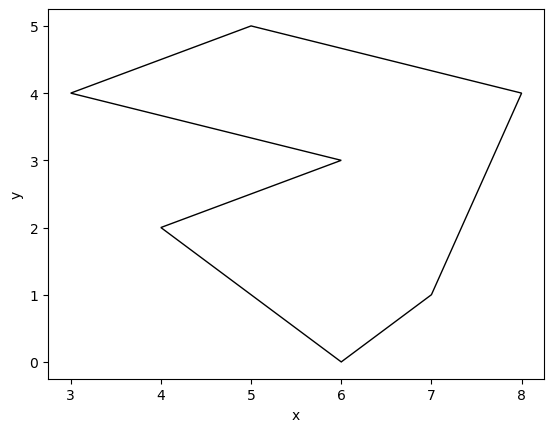

In [ ]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

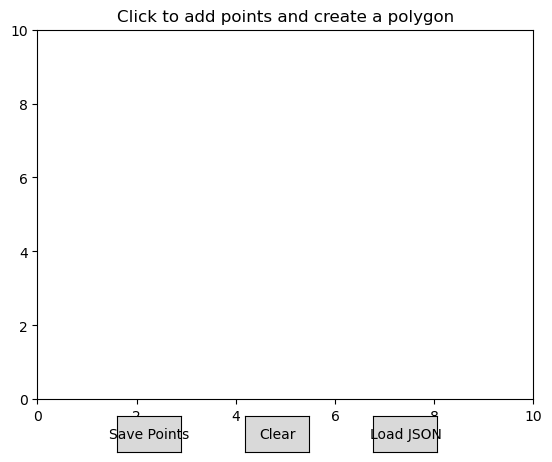

RuntimeError: 'ipynb is not a recognised GUI loop or backend name

In [ ]:
%matplotlib inline
draw_custom_polygon()
%matplotlib ipynb

polygon = polygon_example_1

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [ ]:
def min_max(T):
    n = len(T)
    min_val = T[-1][1]
    max_val = T[-1][1]
    min_val_id = n - 1
    max_val_id = n - 1

    for i in range(0, n - 1):
        if T[i][1] < T[i + 1][1]:
            if T[i][1] < min_val:
                min_val = T[i][1]
                min_val_id = i
            if T[i + 1][1] > max_val:
                max_val = T[i + 1][1]
                max_val_id = i + 1
        else:
            if T[i + 1][1] < min_val:
                min_val = T[i + 1][1]
                min_val_id = i + 1
            if T[i][1] > max_val:
                max_val = T[i][1]
                max_val_id = i

    return min_val_id, max_val_id

In [ ]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """

    n = len(polygon)
    min_id, max_id = min_max(polygon)
    i = max_id
    while i != min_id:
        j = (i + 1) % n
        if polygon[j][1] >= polygon[i][1]: return False
        i = j

    while i != max_id:
        j = (i + 1) % n
        if polygon[j][1] <= polygon[i][1]: return False
        i = j

    return True
   
    raise Exception("Unimplemented")

In [ ]:
def make_chains(polygon):
    n = len(polygon)
    
    min_id, max_id = min_max(polygon)
    # () = point, id
    left, right = [(polygon[max_id], max_id)], []

    i = max_id
    while i != min_id:
        j = (i + 1) % n
        left.append((polygon[j], j))
        i = j

    while i != max_id:
        j = (i + 1) % n
        right.append((polygon[j], j))
        i = j

    right.pop()
    right.reverse()

    return left, right

Przeprowadź test poprawności powyższej funkcji.

In [ ]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.016s


Sprawdź monotoniczność swojego wielokątu.

In [ ]:
print(is_y_monotonic(polygon))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

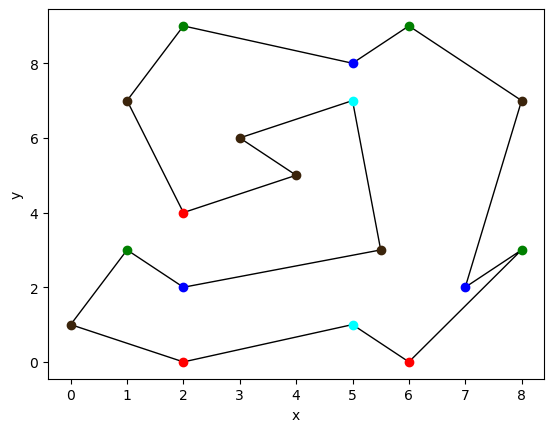

In [ ]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [ ]:
def cross(a, b, c):
    return (b[0] - a[0]) * (c[1] - b[1]) - (b[1] - a[1]) * (c[0] - b[0])

def color_vertex(polygon):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    eps = 0

    n = len(polygon)
    colors = [None] * n

    for i in range(n):
        prev = polygon[i - 1]
        curr = polygon[i]
        next = polygon[(i + 1) % n]
        crossRes = cross(prev, curr, next)
        if prev[1] < curr[1] and next[1] < curr[1]:
            if crossRes > eps:
                colors[i] = 0
            elif crossRes < -eps:
                colors[i] = 3
            else: colors[i] = 4
        elif prev[1] > curr[1] and next[1] > curr[1]:
            if crossRes > eps:
                colors[i] = 1
            elif crossRes < -eps:
                colors[i] = 2
            else: colors[i] = 4
        else:
            colors[i] = 4

    return colors

    raise Exception("Unimplemented")

Przeprowadź test poprawności powyższej funkcji. 

In [ ]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

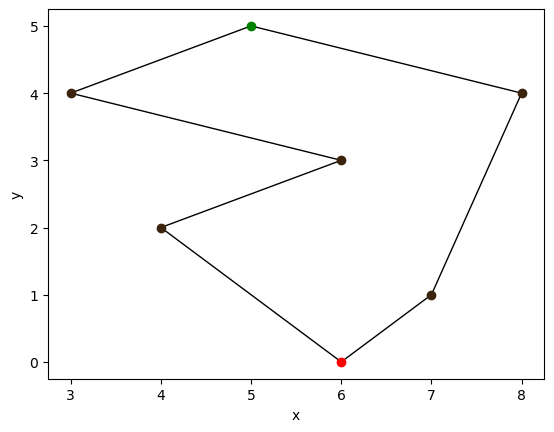

In [ ]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

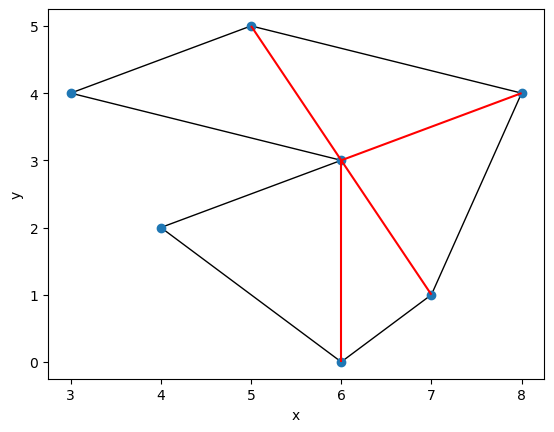

In [ ]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [ ]:
def merge_chains(left, right, n):
    merged = [None] * n

    i, j, k = 0, 0, 0
    # skoro left zawiera min_y to na pewno wcześniej skończy się right
    while j < len(right):
        if left[i][0][1] > right[j][0][1]:
            merged[k] = (*left[i], 0) # do krotki dodana informacja o tym czy na lewym czy na prawym łańcuchu
            i += 1
        else:
            merged[k] = (*right[j], 1)
            j += 1
        k += 1

    for index in range(i, len(left)):
        merged[k] = (*left[index], 0)
        k += 1

    return merged

def proper_triangle(S_first, S_second, curr, n, eps):
    # sprawdza czy może powstać odpowiedni trójkąt w triangulacji gdy curr pochodzi z przeciwnego łańcucha niż punkty na stosie
    # pomaga w niedodawaniu przekątnych, które są bokami

    diff = abs(curr[1] - S_first[1])
    if diff == 1 or diff == n - 1: return False # sprawdzenie czy są "sąsiadami" w orygianlnym wielokącie

    if curr[2] == 1:
        return cross(S_first[0], S_second[0], curr[0]) < -eps
    else:
        return cross(S_first[0], S_second[0], curr[0]) > eps 

In [ ]:
def triangulation(polygon, eps = 10**-8):

    n = len(polygon)

    #chains = make_chains(polygon)

    sorted = merge_chains(*make_chains(polygon), n)
    result = []
    
    S = [sorted[0], sorted[1]] # stos

    for i in range(2, n):
        curr = sorted[i]
        if curr[2] != S[-1][2]: # jeśli kolejny wierzchołek należy do innego łańcucha niż wierzchołek stanowiący szczyt stosu
            for j in range(len(S) - 1, -1, -1):
                diff = abs(curr[1] - S[j][1])
                if diff != 1 and diff != n - 1: # czy wierzchołki nie są "sąsiadami" w oryginalnym wielokącie
                    result.append((curr[1], S[j][1]))
            S = [S[-1]] # na stosie zostaje jak na razie poprzedni punkt z wierzchu
        else: # kiedy są na tym samym łańcuchu
            last = len(S) - 1
            for j in range(len(S) - 2, -1, -1):
                if proper_triangle(S[j], S[last], curr, n, eps):
                    result.append((curr[1], S[j][1]))
                    for _ in range(len(S) - 1, last - 1, -1):
                        S.pop()
                    last = j
        S.append(curr)

    return result
    raise Exception("Unimplemented")

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [ ]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: 

TypeError: merge_chains() missing 1 required positional argument: 'n'

Zwizualizuj powstały wielokąt podzielony na trójkąty.

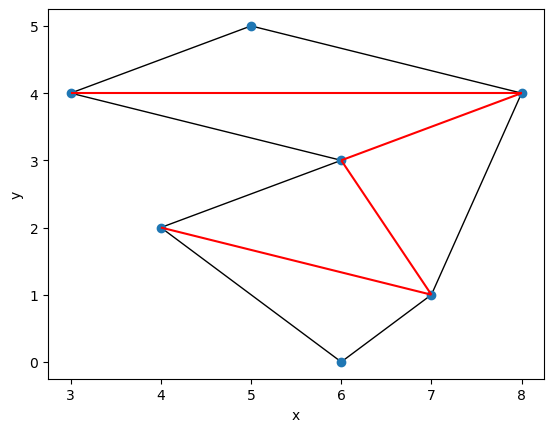

In [ ]:
tri = triangulation(polygon)
draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])